In [1]:
# LIBRARY
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 

In [2]:
def getM(m):
    std = np.sqrt(m)
    M=np.random.normal(0,std,(m,m))
    
    # make upper triagular 
    for i in range(m):
        for j in range(m):
            if i > j: M[i,j] = 0
    return(M)

getM(4)

array([[ 0.2145633 ,  2.24180861,  1.05245273,  3.19085543],
       [ 0.        , -0.56955185,  2.13499367,  4.99946612],
       [ 0.        ,  0.        ,  0.26638803,  0.22212757],
       [ 0.        ,  0.        ,  0.        ,  1.68536008]])

In [3]:
m=4
M=getM(m)
eVal, eVect = np.linalg.eig(M)
mVect = np.ones(eVal.shape[0])*m
np.column_stack((mVect,eVal))

array([[ 4.        , -0.80400364],
       [ 4.        ,  0.61699409],
       [ 4.        ,  2.19615384],
       [ 4.        ,  0.57062408]])

In [4]:
n = 100 # number of matrices to generate for each m value
mVals = [8,16,32,64,128,256]
# allEvals = np.array([])
allEvals=np.empty((0,2))
# allEvals = []
for m in mVals:
    print('Calculating results for m='+str(m))
    for i in range(n):
        M=getM(m)
        eVal, eVect = np.linalg.eig(M)
        mVect = np.ones(eVal.shape[0])*m
        e = np.column_stack((mVect,eVal))
        # if allEvals==0
        allEvals = np.append(allEvals,e,axis=0)
        # allEvals.append(e)
    
    h = allEvals[np.where(allEvals[:,0] == m)]
    print(' max: '+str(np.max(h)))
    print(' min: '+str(np.min(h)))
# allEvals

Calculating results for m=8
 max: 9.186419319416492
 min: -12.18822611785172
Calculating results for m=16
 max: 16.0
 min: -14.289231326443574
Calculating results for m=32
 max: 32.0
 min: -19.86233771280137
Calculating results for m=64
 max: 64.0
 min: -27.51249108277261
Calculating results for m=128
 max: 128.0
 min: -46.41983466360711
Calculating results for m=256
 max: 256.0
 min: -61.67523527910944


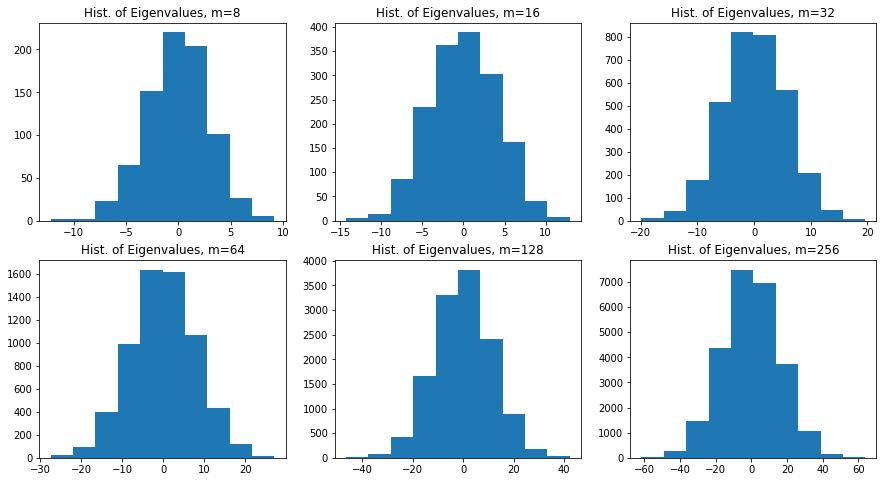

In [5]:
plt.figure(figsize=(15,8))

plt.subplot(2, 3, 1) # row 1, col 2 index 1
m=8
h = allEvals[np.where(allEvals[:,0] == m)]
plt.hist(h[:,1])
plt.title("Hist. of Eigenvalues, m="+str(m))

plt.subplot(2, 3, 2) # index 2
m=16
h = allEvals[np.where(allEvals[:,0] == m)]
plt.hist(h[:,1])
plt.title("Hist. of Eigenvalues, m="+str(m))


plt.subplot(2, 3, 3) # index 2
m=32
h = allEvals[np.where(allEvals[:,0] == m)]
plt.hist(h[:,1])
plt.title("Hist. of Eigenvalues, m="+str(m))



plt.subplot(2, 3, 4) # row 1, col 2 index 1
m=64
h = allEvals[np.where(allEvals[:,0] == m)]
plt.hist(h[:,1])
plt.title("Hist. of Eigenvalues, m="+str(m))

plt.subplot(2, 3, 5) # index 2
m=128
h = allEvals[np.where(allEvals[:,0] == m)]
plt.hist(h[:,1])
plt.title("Hist. of Eigenvalues, m="+str(m))


plt.subplot(2, 3, 6) # index 2
m=256
h = allEvals[np.where(allEvals[:,0] == m)]
plt.hist(h[:,1])
plt.title("Hist. of Eigenvalues, m="+str(m))


plt.show()

In [6]:
n = 100 # number of matrices to generate for each m value
mVals = [8,16,32,64,128,256,512]
# allEvals = np.array([])
allVals=np.empty((0,4))
# allEvals = []
for m in mVals:
    for i in range(n):
        M=getM(m)
        l2 = np.linalg.norm(M,2)
        eVal, eVect = np.linalg.eig(M)
        sr=np.max(eVal) # rho(M), spectral radius, is it's largest eigenvalue
        
        U,s,V = np.linalg.svd(M)
        svMin = np.min(s) # smallest singular value
        
        # mVect = np.ones(eVal.shape[0])*m
        # e = np.column_stack((mVect,eVal))
        # if allEvals==0
        allVals = np.append(allVals,[[m,l2,sr,svMin]],axis=0)
        # allEvals.append(e)
    
# allNorms

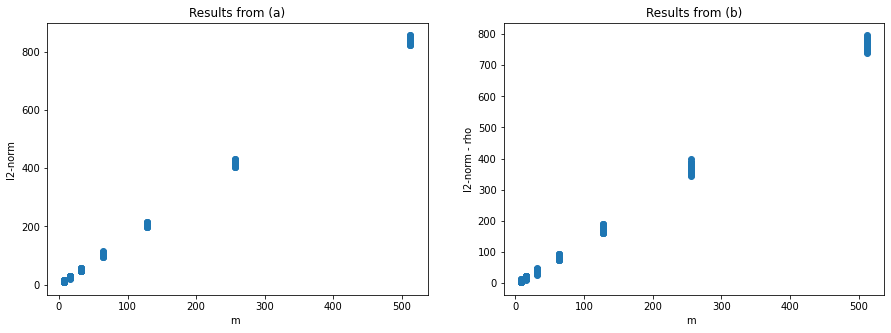

In [7]:
# x = allNorms[:,0] # m
# y = allNorms[:,1] - allNorms[:,2] #l2 - rho(a)
# plt.plot(x, y, 'o');

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(allVals[:,0], allVals[:,1],'o')
plt.title("Results from (a)")
plt.xlabel('m ')
plt.ylabel('l2-norm ')

plt.subplot(1, 2, 2) # index 2
plt.plot(allVals[:,0], allVals[:,1] - allVals[:,2],'o')
plt.title("Results from (b)")
plt.xlabel('m ')
plt.ylabel('l2-norm - rho')

plt.show()

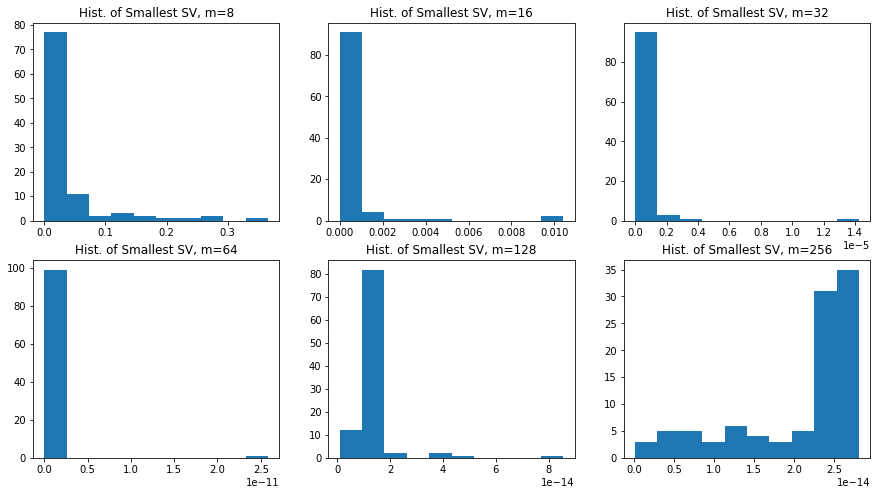

In [8]:
plt.figure(figsize=(15,8))

plt.subplot(2, 3, 1) # row 1, col 2 index 1
m=8
h = allVals[np.where(allVals[:,0] == m)][:,3]
plt.hist(h)
plt.title("Hist. of Smallest SV, m="+str(m))

plt.subplot(2, 3, 2) # index 2
m=16
h = allVals[np.where(allVals[:,0] == m)][:,3]
plt.hist(h)
plt.title("Hist. of Smallest SV, m="+str(m))


plt.subplot(2, 3, 3) # index 2
m=32
h = allVals[np.where(allVals[:,0] == m)][:,3]
plt.hist(h)
plt.title("Hist. of Smallest SV, m="+str(m))



plt.subplot(2, 3, 4) # row 1, col 2 index 1
m=64
h = allVals[np.where(allVals[:,0] == m)][:,3]
plt.hist(h)
plt.title("Hist. of Smallest SV, m="+str(m))

plt.subplot(2, 3, 5) # index 2
m=128
h = allVals[np.where(allVals[:,0] == m)][:,3]
plt.hist(h)
plt.title("Hist. of Smallest SV, m="+str(m))


plt.subplot(2, 3, 6) # index 2
m=256
h = allVals[np.where(allVals[:,0] == m)][:,3]
plt.hist(h)
plt.title("Hist. of Smallest SV, m="+str(m))


plt.show()